# So you want to make a killer app?
# Well then what kind of app should it be?  Which category should it be in?  Should you settle for throwing together a free app?  Should you take time making a good paid app, or will the price scare people away?
## In this project, we will analyze data from the Google Play App Store.
## We will use use Pandas to make dataframes from two csv files:
## 1. app data
## 2. user review data
## Thereafter we will determine what questions we can answer using the data we have.
## We will determine what limitations our data has based on what we want to ask and what data we have, and how to work around these limitations via data-cleansing.
## Finally, we will use Matplotlib to produce visuals to display our findings.

## Visualization Ideas:

Compare something about each category on multiple line graphs / scatter plots
https://python-graph-gallery.com/125-small-multiples-for-line-chart/
https://python-graph-gallery.com/199-matplotlib-style-sheets/
https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
https://python-graph-gallery.com/111-custom-correlogram/
https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
https://python-graph-gallery.com/242-area-chart-and-faceting/
http://python-graph-gallery.com/242-area-chart-and-faceting/

3-Dimensional graphs
https://python-graph-gallery.com/372-3d-pca-result/
https://python-graph-gallery.com/370-3d-scatterplot/
https://python-graph-gallery.com/371-surface-plot/
https://python-graph-gallery.com/342-animation-on-3d-plot/
https://python-graph-gallery.com/312-add-markers-on-folium-map/

Animated Graphs
https://python-graph-gallery.com/341-python-gapminder-animation/ - Change per category, change per number of times downloaded bins? Change per size? Change per price?
https://python-graph-gallery.com/340-scatterplot-animation/

Annotate Graph
https://python-graph-gallery.com/193-annotate-matplotlib-chart/

Multiple bars bar chart
https://python-graph-gallery.com/11-grouped-barplot/ - Comparing all apps vs only ones with rating?

Stacked barcharts- comparing all apps vs only ones with rating?
https://python-graph-gallery.com/13-percent-stacked-barplot/
https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
https://python-graph-gallery.com/11-grouped-barplot/
https://python-graph-gallery.com/10-barplot-with-number-of-observation/

Chord diagram
https://python-graph-gallery.com/231-chord-diagram-with-bokeh/

Word clouds- use with reviews dataframe?
http://python-graph-gallery.com/wordcloud/
https://python-graph-gallery.com/260-basic-wordcloud/
https://python-graph-gallery.com/261-custom-python-wordcloud/
https://python-graph-gallery.com/200-basic-treemap-with-python/
https://python-graph-gallery.com/201-control-the-color-of-treemap/

Multiple lines same chart
https://python-graph-gallery.com/122-multiple-lines-chart/

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D


In [3]:
app_data = pd.read_csv("Data/google-play-store-apps/googleplaystore.csv")
review_data = pd.read_csv("Data/google-play-store-apps/googleplaystore_user_reviews.csv")

In [4]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## After reviewing the data we have to work with, we have the following questions:

### 1. What is the general opinion on each app category; that is, what is the mean rating for each category of apps?
### 2. If we put the apps into bins according to price range, are apps downloaded more often the cheaper they cost, and if so, at which point do the number of downloads begin to dramatically decrease?
### 3. If we search a list of keywords, how often does each keyword show up in written reviews?
### 4. Given the same list of keywords, how often are reviews that contain that word positive, negative, and neutral?
### 5. 

In [6]:
print("app_data:")
print(app_data.shape)
print(app_data.count())

print("\nreview_data:")
print(review_data.shape)
print(review_data.count())

app_data:
(10841, 13)
App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

review_data:
(64295, 5)
App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64


In [7]:
app_data_no_na = app_data.dropna(how="any")
review_data_no_na = review_data.dropna(how="any")

In [8]:
print("App Data:")
print(app_data_no_na.shape)
print(app_data_no_na.count())
print("\nReview Data")
print(review_data_no_na.shape)
print(review_data_no_na.count())

App Data:
(9360, 13)
App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

Review Data
(37427, 5)
App                       37427
Translated_Review         37427
Sentiment                 37427
Sentiment_Polarity        37427
Sentiment_Subjectivity    37427
dtype: int64


In [9]:
categories = app_data_no_na["Category"].unique()
average_rating_by_category = app_data_no_na.groupby("Category", sort=False)["Rating"].mean()

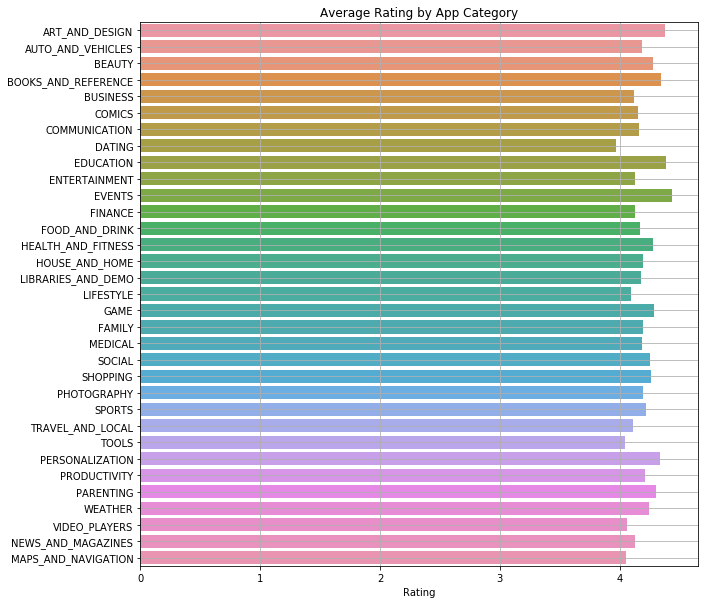

In [10]:
plt.subplots(figsize=(10,10))
sns.barplot(average_rating_by_category, categories, orient="h")
plt.grid()
plt.title("Average Rating by App Category")
plt.show()

## Right now it's still difficult to tell the difference between the average ratings.  We will sort the categories in order by rating.

In [11]:
average_rating_by_category_sorted = average_rating_by_category.sort_values()
categories_sorted_by_average_rating = average_rating_by_category_sorted.index

In [12]:
print(average_rating_by_category_sorted.head(1))
print(average_rating_by_category_sorted.nlargest(1))

Category
DATING    3.970769
Name: Rating, dtype: float64
Category
EVENTS    4.435556
Name: Rating, dtype: float64


## We also notice that each category's average rating lies somewhere between 3.9 and 4.5.  We will also adjust our axis to more accurately show the range of values.

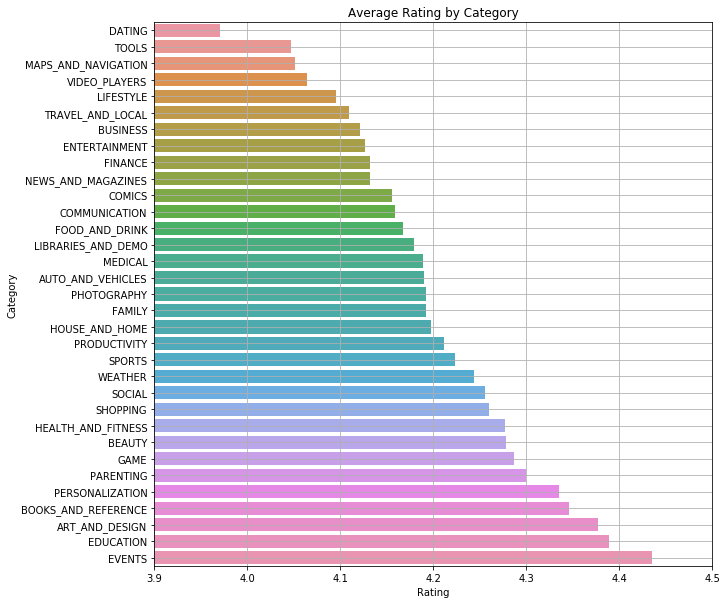

In [13]:
plt.subplots(figsize=(10,10))
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
plt.title("Average Rating by Category")
bar_chart_average_rating_by_category.set(xlim=(3.9,4.5))
plt.grid()
plt.show()

## TOTAL INSTALLS BY CATEGORY

In [14]:
app_data_no_na["Installs"].nunique()

19

In [15]:
app_data_no_na["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [16]:
app_data_no_na["Installs Numeric"] = app_data["Installs"].replace({"10,000+":int(10000),
                                                                  "500,000+":int(500000),
                                                                  "5,000,000+":int(5000000),
                                                                  "50,000,000+":int(50000000),
                                                                  "100,000+":int(100000),
                                                                  "50,000+":int(50000),
                                                                  "1,000,000+":int(1000000),
                                                                  "10,000,000+":int(10000000),
                                                                  "5,000+":int(5000),
                                                                  "100,000,000+":int(100000000),
                                                                  "1,000,000,000+":int(1000000000),
                                                                   "1,000+":int(1000),
                                                                   "500,000,000+":int(500000000),
                                                                   "100+":int(100),
                                                                   "500+":int(500),
                                                                   "10+":int(10),
                                                                   "5+":int(5),
                                                                   "50+":int(50),
                                                                   "1+":int(1)})

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
app_data_no_na["Installs Numeric"].nunique()

19

In [18]:
app_data_no_na["Installs Numeric"].unique()

array([10000, 500000, 5000000, 50000000, 100000, 50000, 1000000, 10000000,
       5000, 100000000, 1000000000, 1000, 500000000, 100, 500, 10, 5, 50,
       1], dtype=object)

In [19]:
app_data_no_na['Installs Numeric'] = app_data_no_na['Installs Numeric'].convert_objects(convert_numeric=True)

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
app_data_no_na.dtypes

App                  object
Category             object
Rating              float64
Reviews              object
Size                 object
Installs             object
Type                 object
Price                object
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
Installs Numeric      int64
dtype: object

In [21]:
total_installs_by_category = app_data_no_na.groupby("Category", sort=False)["Installs Numeric"].sum()

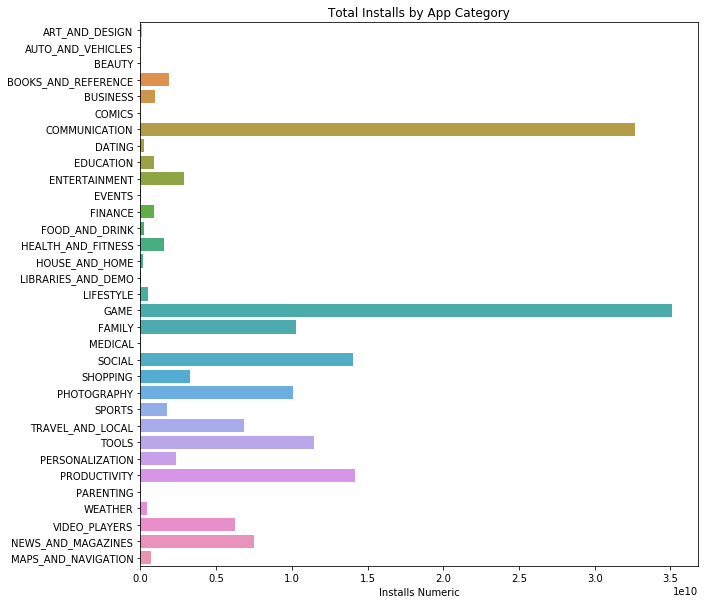

In [22]:
plt.subplots(figsize=(10,10))
sns.barplot(total_installs_by_category, categories, orient="h")
plt.title("Total Installs by App Category")
plt.show()

In [23]:
total_installs_by_category_sorted = total_installs_by_category.sort_values()
categories_sorted_by_total_installs = total_installs_by_category_sorted.index

In [24]:
print(total_installs_by_category_sorted.head(1))
print(total_installs_by_category_sorted.nlargest(1))

Category
EVENTS    15949410
Name: Installs Numeric, dtype: int64
Category
GAME    35085862717
Name: Installs Numeric, dtype: int64


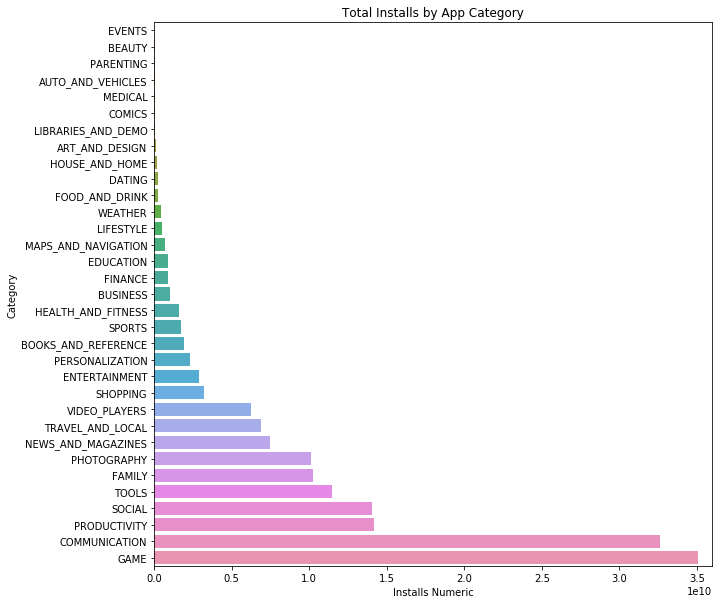

In [25]:
plt.subplots(figsize=(10,10))
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installs by App Category")
plt.show()

# NOW TOGETHER

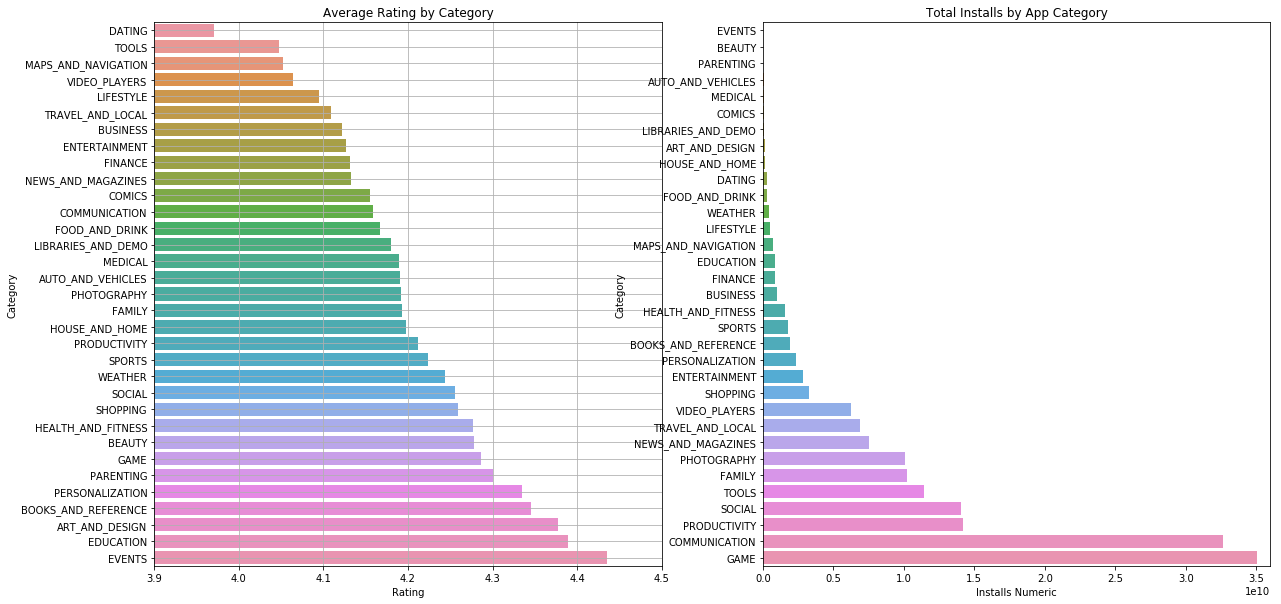

In [26]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
plt.title("Average Rating by Category")
bar_chart_average_rating_by_category.set(xlim=(3.9,4.5))
plt.grid()
plt.subplot(1,2,2)
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installs by App Category")
plt.show()

In [27]:
total_number_apps_by_category = app_data_no_na.groupby("Category")["App"].count()

Text(0.5,1,'Total Number of Apps by Category')

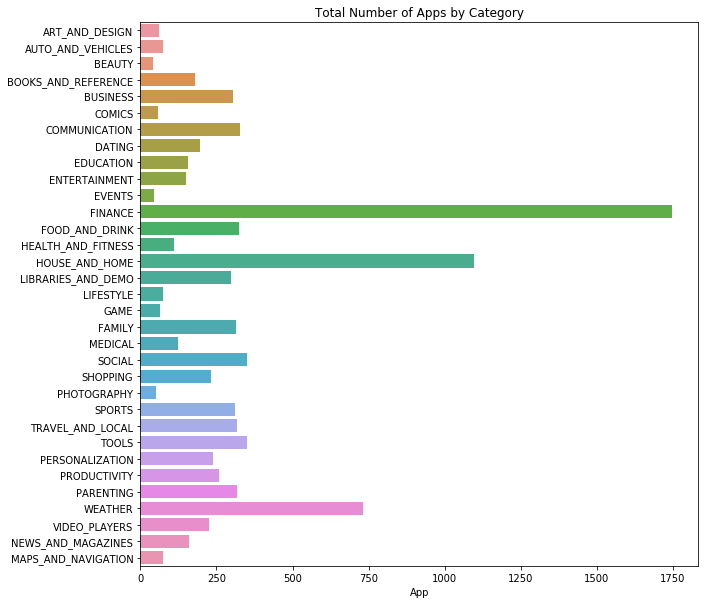

In [28]:
plt.subplots(figsize=(10,10))
sns.barplot(total_number_apps_by_category, categories)
plt.title("Total Number of Apps by Category")

In [29]:
total_number_apps_by_category_sorted = total_number_apps_by_category.sort_values()
categories_sorted_by_number_apps = total_installs_by_category_sorted.index

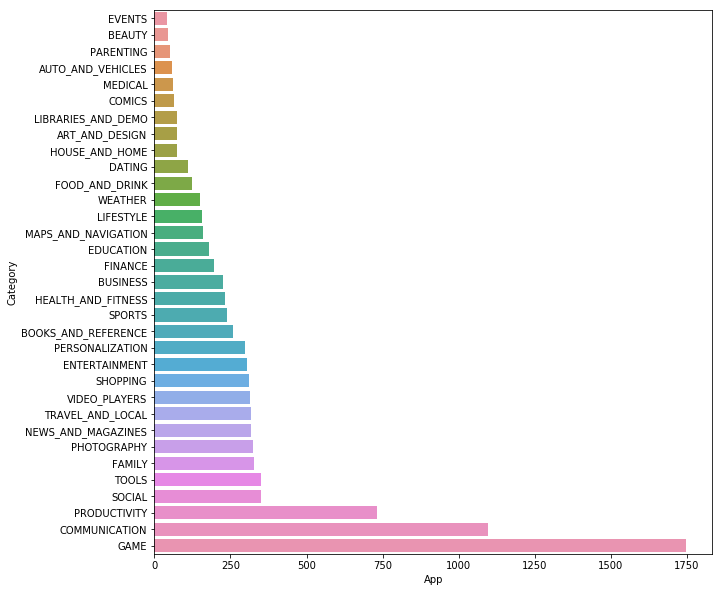

In [30]:
plt.subplots(figsize=(10,10))
sns.barplot(total_number_apps_by_category_sorted, categories_sorted_by_number_apps)

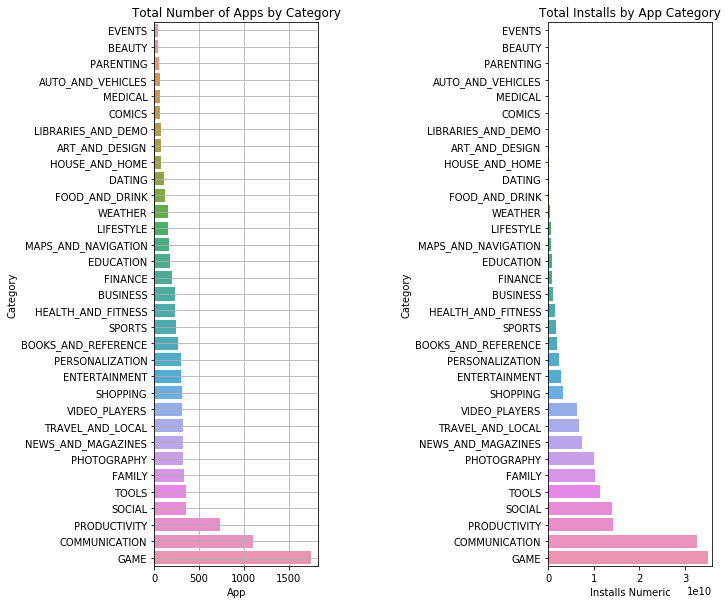

In [31]:
plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
bar_chart_average_rating_by_category = sns.barplot(total_number_apps_by_category_sorted, categories_sorted_by_number_apps, orient="h")
plt.title("Total Number of Apps by Category")
plt.grid()
plt.subplot(1,3,3)
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installs by App Category")
plt.show()

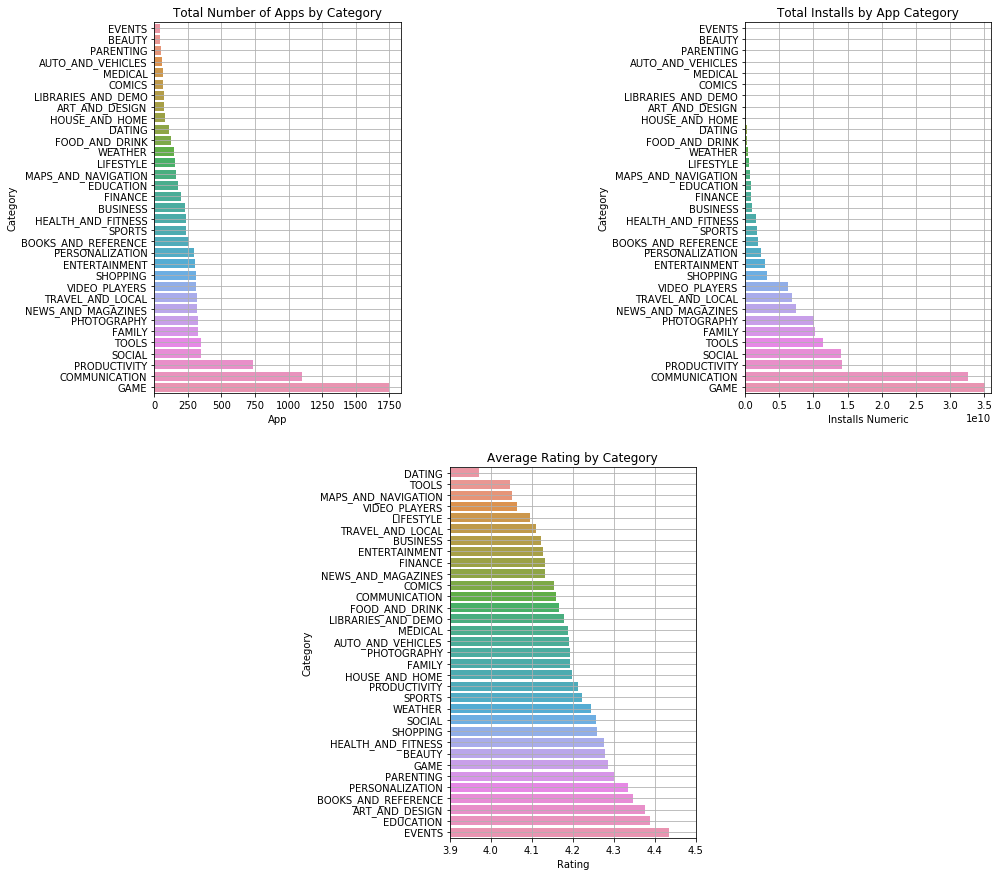

In [32]:
plt.subplots(figsize=(15,15))
plt.subplot(2,3,1)
bar_chart_average_rating_by_category = sns.barplot(total_number_apps_by_category_sorted, categories_sorted_by_number_apps, orient="h")
plt.title("Total Number of Apps by Category")
plt.grid()

plt.subplot(2,3,3)
bar_chart_total_installs_by_category = sns.barplot(total_installs_by_category_sorted, categories_sorted_by_total_installs, orient="h")
bar_chart_total_installs_by_category.set(xlim=(15000000,36000000000))
plt.title("Total Installs by App Category")
plt.grid()

plt.subplot(2,3,5)
bar_chart_average_rating_by_category = sns.barplot(average_rating_by_category_sorted, categories_sorted_by_average_rating, orient="h")
plt.title("Average Rating by Category")
bar_chart_average_rating_by_category.set(xlim=(3.9,4.5))
plt.grid()

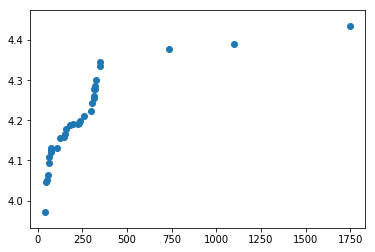

In [33]:
plt.scatter(total_number_apps_by_category_sorted, average_rating_by_category_sorted)

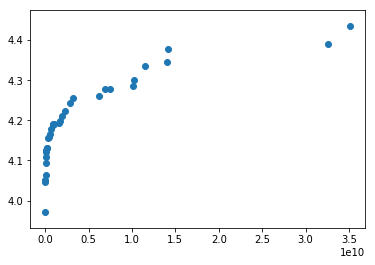

In [34]:
plt.scatter(total_installs_by_category_sorted, average_rating_by_category_sorted)

In [35]:
app_data_no_na["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [36]:
price_numeric = []

for price in app_data_no_na["Price"]:
    if len(price) == 1:
        app_price = int(price)
    elif len(price) > 1:
        app_price = price[1:]
    
    price_numeric.append(app_price)

app_data_no_na["Price Numeric"] = price_numeric


C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [37]:
app_data_no_na[app_data_no_na["Price Numeric"] != 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs Numeric,Price Numeric
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,100000,4.99
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,100000,4.99
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,100000,4.99
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,100000,4.99
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,100000,3.99
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000,3.99
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,1000,6.99
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up,100,7.99
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000,3.99
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63M,"1,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up,1000,3.99


In [38]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [39]:
key_words = []

stop_continue = "continue"
while stop_continue == "continue":
    key_word = input("Which keyword would you like to search for? ")
    key_words.append(key_word)
    print(f"Your key words are: {key_words}")
    user_answer = input("\nWould you like to add another keyword?\nType in the word \"stop\" to exit the process.\nOtherwise hit any key to continue. ")
    
    if user_answer == user_answer.lower() == "stop":
        stop_continue = "stop"
        
print(f"Your key words are: {key_words}")

Which keyword would you like to search for? best
Your key words are: ['best']

Would you like to add another keyword?
Type in the word "stop" to exit the process.
Otherwise hit any key to continue. 
Which keyword would you like to search for? slow
Your key words are: ['best', 'slow']

Would you like to add another keyword?
Type in the word "stop" to exit the process.
Otherwise hit any key to continue. 
Which keyword would you like to search for? advertisement
Your key words are: ['best', 'slow', 'advertisement']

Would you like to add another keyword?
Type in the word "stop" to exit the process.
Otherwise hit any key to continue. stop
Your key words are: ['best', 'slow', 'advertisement']


This program has two methods for forming word clouds.
In both methods the program will search each review for all key words.
If the keyword is found in a review at least once, the program will then:
1. Add only that keyword to a list, then create a word cloud showing the frequency of key words. 
2. Extract every word from that review, to analyze other words that appear with key words.
Please enter 1 to use the first method, or 2 to use the second method. 1


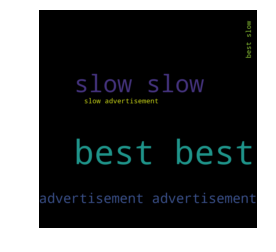

In [40]:
method_selection = input("This program has two methods for forming word clouds.\nIn both methods the program will search each review for all key words.\nIf the keyword is found in a review at least once, the program will then:\n1. Add only that keyword to a list, then create a word cloud showing the frequency of key words. \n2. Extract every word from that review, to analyze other words that appear with key words.\nPlease enter 1 to use the first method, or 2 to use the second method. ")

try:
    
    if int(method_selection) == 1:
        frequency_words_as_list = []

        for word in key_words:
            for review in review_data["Translated_Review"]:
                if str(word) in str(review):
                    frequency_words_as_list.append(word)

        frequency_words_as_string = ""

        for word in frequency_words_as_list:
            frequency_words_as_string += " " + str(frequency_words_as_list[frequency_words_as_list.index(word)])

        wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(frequency_words_as_string)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    elif int(method_selection) == 2:
        review_words = ""

        for word in key_words:
            for review in review_data["Translated_Review"]:
                if word in str(review):
                    review_words += " " + str(review)

        wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(review_words)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        
    else:
        print("It appears you gave an invalid input.  Please try again.")

except:
    print("It appears you gave an invalid input.  Please try again.")

# IDEA: Make a chart where you enter a key word and the program searches reviews for that keyword.  If a review finds that keyword, it determines whether the Sentinment column is set to Positive or Negative, and stores the results in two lists.  Thereafter is graphs a double bar chart to compare whether that keyword is more often negative or positive.

# BONUS: Try to find a way to enter more than one keywords and have each keyword plotted a double bar chart with a legend and any other important info for reading the graph.

In [41]:
review_data["Sentiment"].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [42]:
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

for sentiment in review_data["Sentiment"]:
    if sentiment == "Positive":
        positive_sentiments.append(sentiment)
    elif sentiment == "Negative":
        negative_sentiments.append(sentiment)
    elif sentiment == "Neutral":
        neutral_sentiments.append(sentiment)

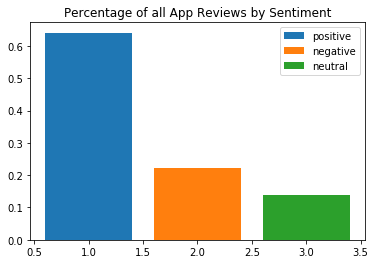

In [43]:
number_reviews_with_sentiment = len(review_data.dropna(subset=["Sentiment"]))

percent_positive = len(positive_sentiments) / number_reviews_with_sentiment
percent_neutral = len(neutral_sentiments) / number_reviews_with_sentiment
percent_negative = len(negative_sentiments) / number_reviews_with_sentiment

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title("Percentage of all App Reviews by Sentiment")
plt.legend(loc="best")

In [44]:
print(percent_positive)
print(percent_negative)
print(percent_neutral)
print(percent_positive+percent_negative+percent_neutral)

0.6411092113699508
0.22096067535798247
0.13793011327206667
1.0


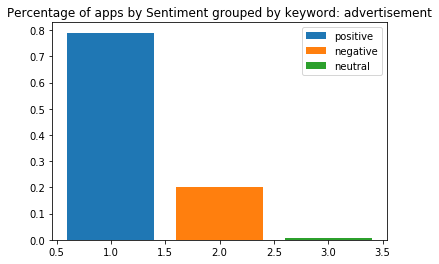

In [45]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []

for key_word in key_words:
    for row in review_data["Review with Sentiment"]:
        if str(key_word) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(key_word) 
                
number_reviews_with_keyword = len(reviews_with_keyword)

percent_positive = 0
percent_neutral = 0
percent_negative = 0

percent_positive = len(positive_sentiments) / number_reviews_with_keyword
percent_neutral = len(neutral_sentiments) / number_reviews_with_keyword
percent_negative = len(negative_sentiments) / number_reviews_with_keyword

plt.bar(1,percent_positive, label="positive")
plt.bar(2, percent_negative, label="negative")
plt.bar(3, percent_neutral, label="neutral")
plt.title(f"Percentage of apps by Sentiment grouped by keyword: {key_word}")
plt.legend(loc="best")

In [46]:
review_data["Review with Sentiment"] = review_data["Translated_Review"] + review_data["Sentiment"]

positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

reviews_with_keyword = []


final_output_metrics = []

for key_word in key_words:
    for row in review_data["Review with Sentiment"]:
        if str(key_word) in str(row):
            if row[-8:] == "Positive":
                positive_sentiments.append(sentiment)
            elif row[-8:] == "Negative":
                negative_sentiments.append(sentiment)
            elif row[-7:] == "Neutral":
                neutral_sentiments.append(sentiment)
            reviews_with_keyword.append(key_word) 
        
        
                
    number_reviews_with_keyword = len(reviews_with_keyword)

    percent_positive = 0
    percent_neutral = 0
    percent_negative = 0

    percent_positive = len(positive_sentiments) / number_reviews_with_keyword
    percent_neutral = len(neutral_sentiments) / number_reviews_with_keyword
    percent_negative = len(negative_sentiments) / number_reviews_with_keyword

    thiskeywordtuple = (key_word, percent_positive, percent_neutral, percent_negative)
    final_output_metrics.append(thiskeywordtuple)

    

print(final_output_metrics)

[('best', 0.9565217391304348, 0.0029476787030213707, 0.040530582166543844), ('slow', 0.8075335397316822, 0.006191950464396285, 0.18627450980392157), ('advertisement', 0.7902988731014209, 0.007839294463498285, 0.20186183243508085)]


In [47]:
review_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review with Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,This help eating healthy exercise regular basi...
2,10 Best Foods for You,NaN,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Works great especially going grocery storePosi...
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Best idea usPositive


In [48]:
outputdf = pd.DataFrame(columns=["word", "positive", "neutral", "negative"])

for i, d in enumerate(final_output_metrics):
    outputdf.loc[i] = list(d)

In [49]:
outputdf

,word,positive,neutral,negative
0,best,0.956522,0.002948,0.040531
1,slow,0.807534,0.006192,0.186275
2,advertisement,0.790299,0.007839,0.201862


In [50]:
outputdf = outputdf.set_index("word")

In [51]:
grapheddata = outputdf.stack()

In [52]:
grapheddata

word                   
best           positive    0.956522
               neutral     0.002948
               negative    0.040531
slow           positive    0.807534
               neutral     0.006192
               negative    0.186275
advertisement  positive    0.790299
               neutral     0.007839
               negative    0.201862
dtype: float64

In [53]:
graphabledata = pd.DataFrame(grapheddata).reset_index()

In [54]:
graphabledata

,word,level_1,0
0,best,positive,0.956522
1,best,neutral,0.002948
2,best,negative,0.040531
3,slow,positive,0.807534
4,slow,neutral,0.006192
5,slow,negative,0.186275
6,advertisement,positive,0.790299
7,advertisement,neutral,0.007839
8,advertisement,negative,0.201862


In [55]:
graphabledata.columns

Index(['word', 'level_1', 0], dtype='object')

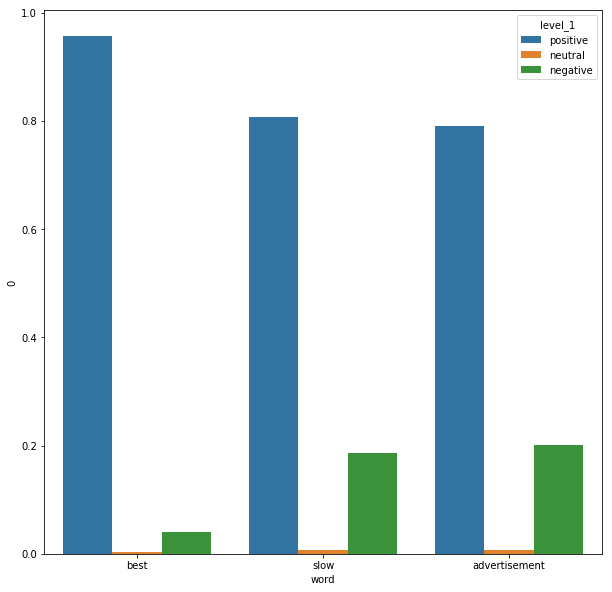

In [56]:
plt.subplots(figsize=(10, 10))
sns.barplot(x="word", y=0, hue="level_1", data=graphabledata)

In [57]:
print(percent_positive*100)
print(percent_negative*100)
print(percent_neutral*100)
print(percent_positive+percent_negative+percent_neutral)

79.02988731014209
20.186183243508086
0.7839294463498285
1.0


In [58]:
# positive_sentiments = []
# negative_sentiments = []
# neutral_sentiments = []

# for key_word in key_words:
#     for review in review_data["Translated_Review"]:
#         if str(key_word) in str(review):
#             for sentiment in review_data["Sentiment"]:
#                 if str(review_data["Sentiment"]) == "Positive":
#                     positive_sentiments.append(" ")
#                 elif str(review_data["Sentiment"]) == "Negative":
#                     negative_sentiments.append(" ")
#                 elif str(review_data["Sentiment"]) == "Neutral":
#                     neutral_sentiments.append(" ")

#                 number_reviews_with_sentiment = len(review_data.dropna(subset=["Sentiment"]))

#                 percent_positive = len(positive_sentiments) / number_reviews_with_sentiment
#                 percent_neutral = len(neutral_sentiments) / number_reviews_with_sentiment
#                 percent_negative = len(negative_sentiments) / number_reviews_with_sentiment

#                 plt.bar(1,percent_positive, label="positive")
#                 plt.bar(2, percent_negative, label="negative")
#                 plt.bar(3, percent_neutral, label="neutral")
#                 plt.legend(loc="best")
    
# plt.show()